In [1]:
import pandas as pd 
from konlpy.tag import Okt 
import nltk 
import requests
from bs4 import BeautifulSoup as bs    
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import warnings
warnings.filterwarnings('ignore')

In [10]:
driver=webdriver.Chrome('./chromedriver.exe')
url='https://www.korea.kr/totalSearch.do?srchFlag=N&keyword=%EC%B0%BD%EC%97%85%ED%8F%90%EC%97%85&oldKeyword=%EC%B0%BD%EC%97%85%ED%8F%90%EC%97%85&resultKeyword=%EC%B0%BD%EC%97%85%ED%8F%90%EC%97%85&sort=date&scnt=1&punit=10&where=news_korea_new_v2&dateRange=all&range=ALL&op=and&multiFlag=Y&news_type=pol'
driver.get(url)
time.sleep(2)
res=[bs(driver.page_source,'html.parser')]

for page in range(2,15):
    if page%10==0:
        driver.find_element(By.LINK_TEXT,str(page)).click()
        time.sleep(2)
        tmp=driver.page_source
        res.append(bs(tmp))
        driver.find_element(By.XPATH,'//*[@id="paging"]/div/a[3]').click()
        
    else: 
        driver.find_element(By.LINK_TEXT,str(page)).click()
        time.sleep(2)
        tmp=driver.page_source
        res.append(bs(tmp))
        
driver.close()
driver.quit()

#제목과 링크를 판다스 df로 만들었음
result=[]
for j in res:
    for i in j.select('span.text>strong>a'):
        result.append({
            '제목':i.text.replace('\t',''),
            '링크':'https://www.korea.kr'+i['href']
        })

df=pd.DataFrame(result)
display(df)


,제목,링크
0,\n기업가형 소상공인 육성하고 행복한 로컬상권 조성한다\n,https://www.korea.kr/news/policyNewsView.do?ne...
1,\n코로나 피해 자영업자·소상공인 맞춤형 금융지원 25일부터 시행\n,https://www.korea.kr/news/policyNewsView.do?ne...
2,\n올해 세무조사 역대 최저 수준으로 축소…홈택스 전면 개편\n,https://www.korea.kr/news/policyNewsView.do?ne...
3,\n외식산업에 5년간 1조원 투자…미래 성장산업으로 육성\n,https://www.korea.kr/news/policyNewsView.do?ne...
4,\n코로나19 온전한 손실 보상…감염병 대응체계 고도화\n,https://www.korea.kr/news/policyNewsView.do?ne...
...,...,...
135,\n“손만 뻗으면 큰 힘이 되어드립니다”\n,https://www.korea.kr/news/policyNewsView.do?ne...
136,\n대-중기 상생보증펀드 출연금 세액공제\n,https://www.korea.kr/news/policyNewsView.do?ne...
137,\n중소기업에 한해 국유재산 임대료 감면\n,https://www.korea.kr/news/policyNewsView.do?ne...
138,\n일자리 찾기 정부 지원 100% 활용법\n,https://www.korea.kr/news/policyNewsView.do?ne...


In [11]:
res_a=[]
for i in df['링크']:
    html=requests.get(i)
    soup=bs(html.text,'html.parser')
    
    title=soup.select_one('div.article-head>h1').text
    date=soup.select('div.info>span')[0].text
    writer=soup.select('div.info>span')[1].text.replace('\t','').replace('\r','')
    contents=soup.find('div','view-cont').text.replace('\n','').replace('\t','').replace('\r','')
    res_a.append([title,date,writer,contents])
#     break

df=pd.DataFrame(res_a)
df.columns=['제목','날짜','작성자','내용']
df

,제목,날짜,작성자,내용
0,기업가형 소상공인 육성하고 행복한 로컬상권 조성한다,2022.08.25,중소벤처기업부,정부가 우리동네 소상공인을 성장하는 혁신기업가로 육성하기 위해 스마트·디지털 기반 ...
1,코로나 피해 자영업자·소상공인 맞춤형 금융지원 25일부터 시행,2022.07.25,금융위원회,금융당국이 총 80조원 규모의 자영업자·소상공인 맞춤형 금융지원 프로그램을 25일부...
2,올해 세무조사 역대 최저 수준으로 축소…홈택스 전면 개편,2022.07.22,국세청,국세청이 복합 경제위기 상황 등을 고려해 올해 역대 최저 수준으로 세무조사를 감축한...
3,외식산업에 5년간 1조원 투자…미래 성장산업으로 육성,2022.07.20,농림축산식품부,"지난 7일 오후 서울 시내 식당가 모습. (사진=저작권자(c) 연합뉴스, 무단 전재..."
4,코로나19 온전한 손실 보상…감염병 대응체계 고도화,2022.05.24,정책브리핑 김차경,"5월 10일 출범한 윤석열정부는 국정비전을 ‘다시 도약하는 대한민국, 함께 잘 사는..."
...,...,...,...,...
135,“손만 뻗으면 큰 힘이 되어드립니다”,2010.09.02,글·사진:위클리공감,"중소기업이나 소점포를 창업하려면 자금, ..."
136,대-중기 상생보증펀드 출연금 세액공제,2010.08.24,기획재정부,우리 경제의 밑바닥을 지키는 버팀목 역할...
137,중소기업에 한해 국유재산 임대료 감면,2010.08.11,기획재정부,내년부터 공장 신·증설시 규제 완화 혜택...
138,일자리 찾기 정부 지원 100% 활용법,2010.05.20,글·사진:위클리공감,올해 정부의 핵심 정책은 일자리 지원이다...


In [21]:
contents=[]
for i in df.index:
    contents.append(df['내용'][i])
print(contents)

['정부가 우리동네 소상공인을 성장하는 혁신기업가로 육성하기 위해 스마트·디지털 기반 경영혁신,\xa0기업가형 소상공인 육성, 행복한 로컬상권 조성 등을 3대 핵심과제로 추진한다.중소벤처기업부는 25일 윤석열\xa0대통령 주재로 열린\xa0‘제6차 비상경제민생회의’에서 이같은 내용의 ‘새정부 소상공인·자영업 정책방향’을 발표했다.새정부는 앞서 ‘코로나19 비상대응 100일 로드맵’을 수립, 소상공인·자영업자의 회복과 도약을 국정과제 1번으로 제시했다. 긴급한 회복지원을 위해 손실보전금 등 약 26조 원도 지원한 바 있다.또 최근 코로나19 여파로 인한 자영업자 부채 증가를 비롯해 과밀경쟁과 같은 구조적 문제, 디지털 전환 가속화, 소비트렌드 변화 등 경영환경도 새롭게 변화함에 따라 정부는 대국민 의견, 업계 현장의견, 민간 전문가의 정책제언을 종합적으로 반영해 이번 대책을 수립했다.윤석열 대통령이 25일 오전 서울 강동구 암사종합시장 내 공동배송센터에서 열린 제6차 비상경제민생회의를 주재하고 있다. (사진=저작권자(c) 연합뉴스, 무단 전재-재배포 금지)먼저 단기적으로는 ‘코로나19·3고(高) 충격 긴급대응플랜’을 통해 소상공인·자영업자가 코로나19 이전 수준으로 회복할 수 있도록 돕는다.소상공인들의 빠른 재기를 위해 ‘폐업-채무조정-재도전 종합 패키지’를 마련한다. 소기업·소상공인공제(노란우산공제) 가입자도 2027년까지 250만 명으로 늘리면서\xa0공제의 복지 혜택을 강화해 사회안전망을 촘촘히 보강한다.중기부는 최근 고금리로 인한 부담을 완화하는 차원에서 약 58조 원 규모의 신규·대환대출을 착실히 공급할 방침이다. 전국적인 소비축제를 매년 5회 이상 집중 추진해 소상공인 매출 상승으로 연결되도록 한다.중장기적으로는 기업가정신과 시장 경쟁력을 갖춘 소상공인이 늘어날 수 있는 여건을 조성해 소상공인·자영업 생태계의 구조적 체질 변화를 추진한다.특히 코로나19의 영향으로 디지털 전환 흐름이 더욱 가속화되고 있어 소상공인·자영업자가 이에 발맞춰 혁신할 수 있도

In [35]:
okt=Okt()
for a in contents.index():
    print(a)
# words=[[]=okt.nouns(contents[a]) for a in contents.index ]
# words

TypeError: index expected at least 1 argument, got 0

In [36]:
contents.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [43]:
df=pd.DataFrame(contents)
df=df[:100]
df

,0
0,정부가 우리동네 소상공인을 성장하는 혁신기업가로 육성하기 위해 스마트·디지털 기반 ...
1,금융당국이 총 80조원 규모의 자영업자·소상공인 맞춤형 금융지원 프로그램을 25일부...
2,국세청이 복합 경제위기 상황 등을 고려해 올해 역대 최저 수준으로 세무조사를 감축한...
3,"지난 7일 오후 서울 시내 식당가 모습. (사진=저작권자(c) 연합뉴스, 무단 전재..."
4,"5월 10일 출범한 윤석열정부는 국정비전을 ‘다시 도약하는 대한민국, 함께 잘 사는..."
...,...
95,장년층의 고용안정을 위해 임금피크제로 임금이 줄어드는 근로자에 대한 지원금이 연간 ...
96,최경환 부총리 겸 기획재정부 장관은 24일 “임금피크제 적용 근로자에 대한 지원을 ...
97,차량공유 서비스 앱으로 12억달러(1조2000억원)의 투자를 유치한 ‘우버(UBER...
98,정부가 서민경제 회복과 골목상권 활성화를 위해 내년부터 2조원 규모의 ‘소상공인시장...


In [51]:
for a in df.index:
    okt=Okt()
    okt.nouns(df[a])

AssertionError: phrase input should be string, not <class 'pandas.core.series.Series'>

In [30]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [64]:
okt=Okt()
word=okt.nouns(contents)
word

['최근',
 '창업',
 '선도',
 '대학',
 '대학생',
 '창업',
 '동아리',
 '연합',
 '회',
 '등',
 '창업',
 '예정자',
 '등',
 '대상',
 '결과',
 '것',
 '팔',
 '곳',
 '마련',
 '것',
 '고',
 '한결',
 '답변',
 '또한',
 '기업',
 '실패',
 '원인',
 '및',
 '중소기업',
 '가장',
 '애로',
 '사항',
 '판매',
 '부진',
 '아이디어',
 '창업',
 '및',
 '기술',
 '개발',
 '통한',
 '창조',
 '혁신',
 '제품',
 '판로',
 '소비자',
 '못',
 '채',
 '사장',
 '경우',
 '중소기업청',
 '초기',
 '창조',
 '혁신',
 '제품',
 '시장',
 '진입',
 '아이디어',
 '사업',
 '판로',
 '로',
 '선',
 '순환',
 '창조경제',
 '생태계',
 '구현',
 '위해',
 '마케팅',
 '이노베이션',
 '지원',
 '사업',
 '시행',
 '계획',
 '확정',
 '발표',
 '사업',
 '계획',
 '신청',
 '접수',
 '시작',
 '고',
 '마케팅',
 '이노베이션',
 '사업',
 '규모',
 '총',
 '개사',
 '개',
 '제품',
 '소비자',
 '반응',
 '조사',
 '대형',
 '유통',
 '사',
 '상품',
 '기획',
 '등',
 '현장',
 '전문가',
 '선정',
 '평가',
 '선별',
 '지원',
 '선정',
 '개',
 '모든',
 '제품',
 '대해',
 '소비자',
 '전문가',
 '평가',
 '통한',
 '시장',
 '조사',
 '실시',
 '그',
 '중',
 '혁신',
 '제품',
 '대해',
 '마케팅',
 '전략',
 '수립',
 '제품',
 '개선',
 '등',
 '지원',
 '정부',
 '보조금',
 '지원',
 '조건',
 '및',
 '우대',
 '사항',
 '구',
 '분',
 '정부',
 '지원',
 '금액',
 '정부',
 '보조금',
 '비중',
 

In [74]:
words = [word[i]for i in range(len(word)) if len(word[i])>=2]    
words

['최근',
 '창업',
 '선도',
 '대학',
 '대학생',
 '창업',
 '동아리',
 '연합',
 '창업',
 '예정자',
 '대상',
 '결과',
 '마련',
 '한결',
 '답변',
 '또한',
 '기업',
 '실패',
 '원인',
 '중소기업',
 '가장',
 '애로',
 '사항',
 '판매',
 '부진',
 '아이디어',
 '창업',
 '기술',
 '개발',
 '통한',
 '창조',
 '혁신',
 '제품',
 '판로',
 '소비자',
 '사장',
 '경우',
 '중소기업청',
 '초기',
 '창조',
 '혁신',
 '제품',
 '시장',
 '진입',
 '아이디어',
 '사업',
 '판로',
 '순환',
 '창조경제',
 '생태계',
 '구현',
 '위해',
 '마케팅',
 '이노베이션',
 '지원',
 '사업',
 '시행',
 '계획',
 '확정',
 '발표',
 '사업',
 '계획',
 '신청',
 '접수',
 '시작',
 '마케팅',
 '이노베이션',
 '사업',
 '규모',
 '개사',
 '제품',
 '소비자',
 '반응',
 '조사',
 '대형',
 '유통',
 '상품',
 '기획',
 '현장',
 '전문가',
 '선정',
 '평가',
 '선별',
 '지원',
 '선정',
 '모든',
 '제품',
 '대해',
 '소비자',
 '전문가',
 '평가',
 '통한',
 '시장',
 '조사',
 '실시',
 '혁신',
 '제품',
 '대해',
 '마케팅',
 '전략',
 '수립',
 '제품',
 '개선',
 '지원',
 '정부',
 '보조금',
 '지원',
 '조건',
 '우대',
 '사항',
 '정부',
 '지원',
 '금액',
 '정부',
 '보조금',
 '비중',
 '고시',
 '장성',
 '조사',
 '소비자',
 '전문가',
 '평가',
 '마케팅',
 '전략',
 '수립',
 '업체',
 '부담',
 '제품',
 '개선',
 '업체',
 '부담',
 '이번',
 '사업',
 '주요',
 '특징',
 '그간',
 '마케팅',
 '사업',

In [75]:
len(words)

347

In [76]:
words=' '.join(words)
words

'최근 창업 선도 대학 대학생 창업 동아리 연합 창업 예정자 대상 결과 마련 한결 답변 또한 기업 실패 원인 중소기업 가장 애로 사항 판매 부진 아이디어 창업 기술 개발 통한 창조 혁신 제품 판로 소비자 사장 경우 중소기업청 초기 창조 혁신 제품 시장 진입 아이디어 사업 판로 순환 창조경제 생태계 구현 위해 마케팅 이노베이션 지원 사업 시행 계획 확정 발표 사업 계획 신청 접수 시작 마케팅 이노베이션 사업 규모 개사 제품 소비자 반응 조사 대형 유통 상품 기획 현장 전문가 선정 평가 선별 지원 선정 모든 제품 대해 소비자 전문가 평가 통한 시장 조사 실시 혁신 제품 대해 마케팅 전략 수립 제품 개선 지원 정부 보조금 지원 조건 우대 사항 정부 지원 금액 정부 보조금 비중 고시 장성 조사 소비자 전문가 평가 마케팅 전략 수립 업체 부담 제품 개선 업체 부담 이번 사업 주요 특징 그간 마케팅 사업 칸막이 지원 제품 중심 종합 마케팅 지원 시스템 마련 통해 혁신 제품 시장 진입 공률 고하 도록 또한 시장 혁신 제품 발굴 시장 조사 기반 선정 시스템 구축 아이디어 혁신 제품 유통 시장 소비자 만날 접근성 제품 대한 시장 조사 참여 기업 대해 제품 전용 판매 입점 기회 제공 혁신 제품 선정 마케팅 전략 수립 이행 경우 마케팅 사업 참여 자격 부여 마케팅 지원 사업 방안 테스트 마켓 시장 검증 인지도 해외진출 백화점 정책 매장 제품 판매 고속도로 휴게소 시장 평가 상품 검증 백화점 민간 유통 입점 홈쇼핑 무료 방송 온라인 판촉 홍보 제품 홍보 프라자 미국 인니 해외 홈쇼핑 진출 사업 신청 자격 중소기업 기본 규정 중소기업 제조 위탁 생산 소비재 완제 다음 신청 자격 충족 지원 제외 사항 해당 경우 신청 신청 자격 개월 이내 국내 시장 유통 입점 생활 주방 가전 멀티미디어 차량 용품 제품군 참고 제품군 생활 가전 주방 가전 기기 멀티미디어 차량 용품 조명 기기 가구 의료기기 유아 용품 스포츠 용품 다만 사업 목적 수입 제품 해외 위탁 생산 제품 제품 건설 자재 부품 중간 

In [77]:
words[:50]

'최근 창업 선도 대학 대학생 창업 동아리 연합 창업 예정자 대상 결과 마련 한결 답변 또한'

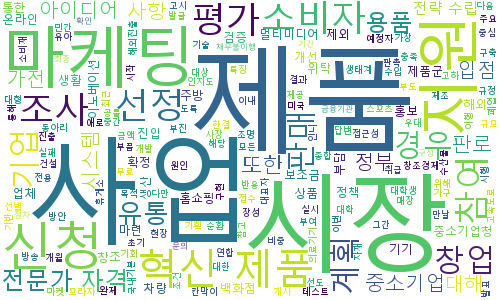

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

wc = WordCloud("C:/windows/fonts/malgun.ttf",
               background_color = "white",
               max_words = 200,
               width=500,
               height=300,
               prefer_horizontal=0.9
              )
wc = wc.generate(words) 

#matplotlib로 시작화(1)
wc.to_image()

In [72]:
wc.words_

{'제품': 1.0,
 '사업': 1.0,
 '시장': 0.8333333333333334,
 '마케팅': 0.8333333333333334,
 '지원': 0.75,
 '신청': 0.6666666666666666,
 '혁신 제품': 0.5833333333333334,
 '소비자': 0.4166666666666667,
 '조사': 0.4166666666666667,
 '선정': 0.4166666666666667,
 '평가': 0.4166666666666667,
 '참여': 0.4166666666666667,
 '창업': 0.3333333333333333,
 '기업': 0.3333333333333333,
 '판매': 0.3333333333333333,
 '경우': 0.3333333333333333,
 '계획': 0.3333333333333333,
 '유통': 0.3333333333333333,
 '전문가': 0.3333333333333333,
 '자격': 0.3333333333333333,
 '용품': 0.3333333333333333,
 '또한': 0.25,
 '중소기업': 0.25,
 '사항': 0.25,
 '아이디어': 0.25,
 '판로': 0.25,
 '대해': 0.25,
 '정부': 0.25,
 '시스템': 0.25,
 '입점': 0.25,
 '가전': 0.25,
 '전략 수립': 0.25,
 '마련': 0.16666666666666666,
 '통한': 0.16666666666666666,
 '창조': 0.16666666666666666,
 '중소기업청': 0.16666666666666666,
 '진입': 0.16666666666666666,
 '이노베이션': 0.16666666666666666,
 '확정': 0.16666666666666666,
 '상품': 0.16666666666666666,
 '개선': 0.16666666666666666,
 '보조금': 0.16666666666666666,
 '업체': 0.16666666666666666,
 '부담'

In [89]:
from collections import Counter
re=words.split(' ') 
cnt = Counter(re)
cnt_words=cnt.most_common()
cnt_words

[('제품', 19),
 ('사업', 12),
 ('시장', 10),
 ('마케팅', 10),
 ('지원', 9),
 ('신청', 8),
 ('혁신', 7),
 ('소비자', 5),
 ('조사', 5),
 ('선정', 5),
 ('평가', 5),
 ('참여', 5),
 ('창업', 4),
 ('기업', 4),
 ('판매', 4),
 ('경우', 4),
 ('계획', 4),
 ('유통', 4),
 ('전문가', 4),
 ('자격', 4),
 ('용품', 4),
 ('또한', 3),
 ('중소기업', 3),
 ('사항', 3),
 ('아이디어', 3),
 ('판로', 3),
 ('대해', 3),
 ('전략', 3),
 ('수립', 3),
 ('정부', 3),
 ('시스템', 3),
 ('입점', 3),
 ('가전', 3),
 ('마련', 2),
 ('통한', 2),
 ('창조', 2),
 ('중소기업청', 2),
 ('진입', 2),
 ('이노베이션', 2),
 ('확정', 2),
 ('상품', 2),
 ('개선', 2),
 ('보조금', 2),
 ('업체', 2),
 ('부담', 2),
 ('검증', 2),
 ('백화점', 2),
 ('정책', 2),
 ('홈쇼핑', 2),
 ('온라인', 2),
 ('홍보', 2),
 ('해외', 2),
 ('위탁', 2),
 ('생산', 2),
 ('제외', 2),
 ('생활', 2),
 ('주방', 2),
 ('멀티미디어', 2),
 ('차량', 2),
 ('제품군', 2),
 ('기기', 2),
 ('최근', 1),
 ('선도', 1),
 ('대학', 1),
 ('대학생', 1),
 ('동아리', 1),
 ('연합', 1),
 ('예정자', 1),
 ('대상', 1),
 ('결과', 1),
 ('한결', 1),
 ('답변', 1),
 ('실패', 1),
 ('원인', 1),
 ('가장', 1),
 ('애로', 1),
 ('부진', 1),
 ('기술', 1),
 ('개발', 1),
 ('사장', 1),
 ('초기', 1),

In [90]:
len(cnt_words)

180

In [93]:
df_word=pd.DataFrame(cnt_words, columns=['word','freq'])
top_20=df_word[:20]

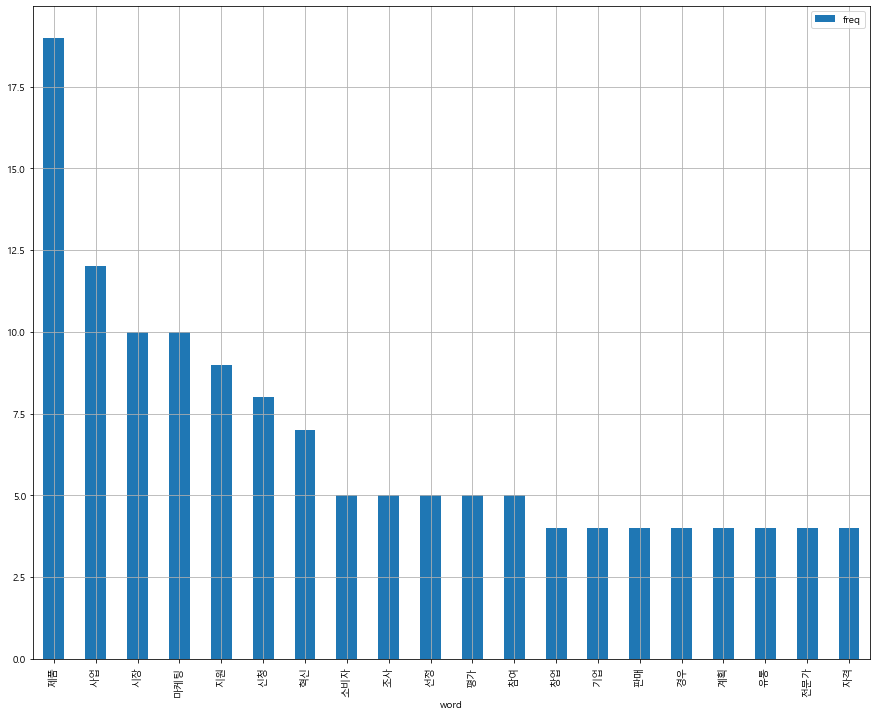

In [94]:
top_20.set_index('word').plot(kind='bar', figsize=(15,12))
plt.grid()

In [95]:
df_word['freq'].sum()

347

In [109]:
cnt_max=df_word['freq'].max()
cnt_max

19

In [110]:
res=[[]for i in range(cnt_max+1)]
res

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [112]:
df_word

,word,freq
0,제품,19
1,사업,12
2,시장,10
3,마케팅,10
4,지원,9
...,...,...
175,기간,1
176,구성,1
177,절차,1
178,최종,1


In [118]:
df_word['word'][0]

'제품'

In [96]:
percent=df_word['freq']/df_word['freq'].sum()
percent

0      0.054755
1      0.034582
2      0.028818
3      0.028818
4      0.025937
         ...   
175    0.002882
176    0.002882
177    0.002882
178    0.002882
179    0.002882
Name: freq, Length: 180, dtype: float64

In [97]:
tmp=df_word['freq']/len(df_word['word'])
tmp

0      0.105556
1      0.066667
2      0.055556
3      0.055556
4      0.050000
         ...   
175    0.005556
176    0.005556
177    0.005556
178    0.005556
179    0.005556
Name: freq, Length: 180, dtype: float64

'최근 창업 선도 대학 대학생 창업 동아리 연합 창업 예정자 대상 결과 마련 한결 답변 또한 기업 실패 원인 중소기업 가장 애로 사항 판매 부진 아이디어 창업 기술 개발 통한 창조 혁신 제품 판로 소비자 사장 경우 중소기업청 초기 창조 혁신 제품 시장 진입 아이디어 사업 판로 순환 창조경제 생태계 구현 위해 마케팅 이노베이션 지원 사업 시행 계획 확정 발표 사업 계획 신청 접수 시작 마케팅 이노베이션 사업 규모 개사 제품 소비자 반응 조사 대형 유통 상품 기획 현장 전문가 선정 평가 선별 지원 선정 모든 제품 대해 소비자 전문가 평가 통한 시장 조사 실시 혁신 제품 대해 마케팅 전략 수립 제품 개선 지원 정부 보조금 지원 조건 우대 사항 정부 지원 금액 정부 보조금 비중 고시 장성 조사 소비자 전문가 평가 마케팅 전략 수립 업체 부담 제품 개선 업체 부담 이번 사업 주요 특징 그간 마케팅 사업 칸막이 지원 제품 중심 종합 마케팅 지원 시스템 마련 통해 혁신 제품 시장 진입 공률 고하 도록 또한 시장 혁신 제품 발굴 시장 조사 기반 선정 시스템 구축 아이디어 혁신 제품 유통 시장 소비자 만날 접근성 제품 대한 시장 조사 참여 기업 대해 제품 전용 판매 입점 기회 제공 혁신 제품 선정 마케팅 전략 수립 이행 경우 마케팅 사업 참여 자격 부여 마케팅 지원 사업 방안 테스트 마켓 시장 검증 인지도 해외진출 백화점 정책 매장 제품 판매 고속도로 휴게소 시장 평가 상품 검증 백화점 민간 유통 입점 홈쇼핑 무료 방송 온라인 판촉 홍보 제품 홍보 프라자 미국 인니 해외 홈쇼핑 진출 사업 신청 자격 중소기업 기본 규정 중소기업 제조 위탁 생산 소비재 완제 다음 신청 자격 충족 지원 제외 사항 해당 경우 신청 신청 자격 개월 이내 국내 시장 유통 입점 생활 주방 가전 멀티미디어 차량 용품 제품군 참고 제품군 생활 가전 주방 가전 기기 멀티미디어 차량 용품 조명 기기 가구 의료기기 유아 용품 스포츠 용품 다만 사업 목적 수입 제품 해외 위탁 생산 제품 제품 건설 자재 부품 중간 